In [4]:
### Dane historyczne dotyczące objętości wysyłek z centrów logistycznym podane w m3.
### Dane uszeregowane datowo od 01.01 do 31.12, w kolumnach objętość w latach 2019,2020,2021 i 2022.
### Praca i obsługa magazynu trwa cały rok bez względ na dni świąteczne.

In [5]:
### import bibliotek
import pandas as pd
import numpy as np
import openpyxl

In [9]:
### pobranie danych
df_dane = pd.read_excel('C:\\Users\\Marek\\Desktop\\Dane SGH - zaleczenie obrona\\praca obrona\\Dane_objetosc1.xlsx')

In [10]:
df_dane

,Objetosc_2019,Objetosc_2020,Objetosc_2021,Objetosc_2022
0,124.56,98.560,45.6500,147.255600
1,639.45,647.560,787.3600,158.265400
2,613.56,602.235,145.3200,874.450000
3,602.23,598.220,856.4500,1106.664977
4,589.66,45.540,456.7854,631.325254
...,...,...,...,...
360,587.77,115.600,785.5800,473.641689
361,547.55,725.880,328.8800,747.611573
362,145.22,902.250,456.3200,740.486111
363,714.56,564.230,415.5500,825.821148


In [11]:
### dopasowanie danych z roku 2022 jako zbiór uczący
y= df_dane['Objetosc_2022']

In [12]:
y

0       147.255600
1       158.265400
2       874.450000
3      1106.664977
4       631.325254
          ...     
360     473.641689
361     747.611573
362     740.486111
363     825.821148
364     669.856246
Name: Objetosc_2022, Length: 365, dtype: float64

In [13]:
### pozbycie się z tabeli danych z roku 2022 i wykorzystanieich jako zbiór "trenujący"
X = df_dane.drop('Objetosc_2022',axis=1)

In [14]:
X

,Objetosc_2019,Objetosc_2020,Objetosc_2021
0,124.56,98.560,45.6500
1,639.45,647.560,787.3600
2,613.56,602.235,145.3200
3,602.23,598.220,856.4500
4,589.66,45.540,456.7854
...,...,...,...
360,587.77,115.600,785.5800
361,547.55,725.880,328.8800
362,145.22,902.250,456.3200
363,714.56,564.230,415.5500


In [15]:
### Pobranie odpowiednich bliliotek
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=100)

In [16]:
X_test

,Objetosc_2019,Objetosc_2020,Objetosc_2021
147,700.21,587.45,415.323
125,745.25,698.45,789.230
314,456.25,325.23,98.990
56,745.25,601.50,487.120
241,587.77,189.60,802.220
...,...,...,...
136,547.44,135.23,745.260
191,502.33,354.22,112.230
360,587.77,115.60,785.580
3,602.23,598.22,856.450


In [17]:
### model regresji liniowej
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [18]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

In [19]:
y_lr_train_pred

array([587.52986583, 584.90190604, 580.83939763, 577.65657205,
       602.55610573, 593.0418921 , 593.31759698, 619.28883245,
       592.63504988, 594.76971087, 624.42720177, 587.21811216,
       619.35431768, 596.02110157, 611.69703346, 591.37516433,
       598.2189064 , 601.92289934, 569.93066465, 616.94374128,
       623.30141288, 592.12755588, 599.91459482, 604.40508362,
       610.78350992, 597.12491219, 594.09421714, 592.68908928,
       581.41519169, 617.58522837, 590.82133632, 576.10585245,
       614.78471229, 639.92769176, 582.65033784, 548.67978838,
       617.63363885, 558.21033874, 593.92469428, 598.60223502,
       601.99415539, 580.39267114, 584.20146942, 589.66781267,
       621.99707989, 628.51713742, 601.39555608, 580.63251445,
       598.46144345, 573.42211353, 594.15560434, 587.68306108,
       615.66011168, 606.10713513, 621.60732593, 606.7637825 ,
       609.21479486, 617.76991772, 598.32664001, 626.92945745,
       586.1092568 , 616.86099792, 633.25434452, 585.14

In [20]:
y_lr_test_pred

array([605.39210655, 585.207174  , 633.33837585, 601.92554656,
       616.99795106, 598.4814206 , 609.55281826, 601.37957628,
       620.50231552, 588.6168169 , 596.47338129, 616.23005009,
       616.68182668, 591.89116776, 604.79197777, 614.61268382,
       578.44895995, 607.47806512, 585.26266185, 589.86659654,
       603.17161028, 583.58656139, 593.79222901, 611.17689305,
       590.52475409, 587.04528698, 606.93258822, 592.50642431,
       597.17318675, 591.97744161, 597.76519753, 620.88056946,
       568.78503928, 607.19650651, 610.15379723, 587.43151102,
       618.56901905, 573.13031186, 591.80948856, 594.42973832,
       610.62463385, 643.09341161, 594.8872077 , 589.56178391,
       638.03898561, 621.18371014, 615.00935475, 621.98309302,
       621.38992692, 626.03987032, 616.39216292, 597.50040174,
       623.91475777, 595.22781915, 589.03841254, 628.90933247,
       582.47987172, 580.05740684, 617.1539322 , 615.57050425,
       588.91061879, 616.66595156, 596.76527986, 606.35

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mean = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mean = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [22]:
lr_train_mean

62284.198233170406

In [23]:
lr_train_r2

0.004608547820911579

In [24]:
lr_test_mean

68709.60831239606

In [25]:
lr_test_r2

-0.009714659158667205

In [26]:
lr_results = pd.DataFrame(['LinearRegression',lr_train_mean,lr_train_r2,lr_test_mean,lr_test_r2]).transpose()

In [27]:
lr_results

,0,1,2,3,4
0,LinearRegression,62284.2,0.00460855,68709.6,-0.00971466


In [28]:
### model random forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=2, random_state=100)

In [29]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mean = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mean = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [31]:
rf_results = pd.DataFrame(['RandomForrest',rf_train_mean,rf_train_r2,rf_test_mean,rf_test_r2]).transpose()

In [32]:
rf_results

,0,1,2,3,4
0,RandomForrest,37983.3,0.392971,56494.9,0.169785


In [33]:
df_models = pd.concat([lr_results,rf_results], axis=0).reset_index(drop=True)

In [34]:
df_models

,0,1,2,3,4
0,LinearRegression,62284.2,0.00460855,68709.6,-0.00971466
1,RandomForrest,37983.3,0.392971,56494.9,0.169785


Text(0.5, 0, 'Dane historyczne')

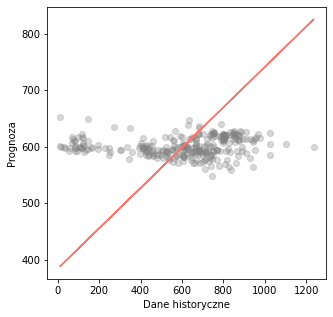

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_lr_train_pred, alpha=0.3, c='grey')

p= np.polyfit(y_train, y_rf_train_pred, 1)
r= np.poly1d(p)

plt.plot(y_train, r(y_train), '#F8766D')
plt.ylabel('Prognoza')
plt.xlabel('Dane historyczne')

Text(0.5, 0, 'Dane historyczne')

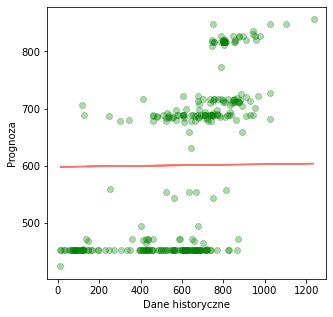

In [36]:
plt.figure(figsize=(5,5))
plt.scatter(x=y_train, y=y_rf_train_pred, alpha=0.3, c='green')

p= np.polyfit(y_train, y_lr_train_pred, 1)
r= np.poly1d(p)

plt.plot(y_train, r(y_train), '#F8766D')
plt.ylabel('Prognoza')
plt.xlabel('Dane historyczne')

In [37]:
### Wnisoki
### Objętość wzratsta sumarycznie z każdym rokiem
### Najczęściej spotykaną wartościąjest objętość 600 m3